## Perakende Veri Analizi

### Bu notebook, bir perakende satış veri setini kullanarak temel veri analizi, temizleme ve görselleştirme işlemleri gerçekleştirmektedir. Özellikle iade edilen ürünler üzerine odaklanarak, iade trendlerini, en çok iade edilen ürünleri ve ülkeleri analiz eder.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'DejaVu Sans' # Ya da uygun bir Türkçe font, örn: 'Arial Unicode MS'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['figure.titlesize'] = 16
plt.style.use('seaborn-v0_8-darkgrid') # Daha modern ve okunaklı bir stil
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.rc('figure', titlesize=16)

## 1. Veri Yükleme ve İlk İnceleme

### Veri setini yüklüyoruz

#### 'retail.xlsx' dosyasının notebook ile aynı dizinde olması gerekmektedir.

In [2]:
try:
    df = pd.read_excel('retail.xlsx')
    print("Veri başarıyla yüklendi.")
except FileNotFoundError:
    print("Hata: 'retail.xlsx' dosyası bulunamadı. Lütfen dosyanın doğru dizinde olduğundan emin olun.")
    # Dosya bulunamazsa daha fazla işlem yapmamak için çıkış yapıyoruz
    exit()


Veri başarıyla yüklendi.



### Veri setinin genel bilgilerini göster

In [3]:
print("Veri Seti Bilgileri:")
df.info()


Veri Seti Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Veri setinin ilk 10 satırını göster


In [4]:
print("\nVeri Setinin İlk 10 Satırı:")
df.head(10)


Veri Setinin İlk 10 Satırı:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


### Her sütundaki eksik değer sayısını kontrol et

In [5]:
print("\nEksik Değer Sayıları (Başlangıç):")
print(df.isnull().sum())


Eksik Değer Sayıları (Başlangıç):
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


## 2. Veri Temizleme ve Ön İşleme

### 'Description' sütunundaki eksik (NaN) değerleri 'Bilinmiyor' olarak doldur

In [6]:
df['Description'] = df['Description'].fillna('Bilinmiyor')

### 'Description' sütunundaki '?' ve '??' gibi anlamsız değerleri 'Bilinmiyor' olarak değiştir

In [7]:
df['Description'] = df['Description'].replace(['?', '??'], 'Bilinmiyor')

### Temizlenmiş 'Description' sütunundaki eksik değerleri tekrar kontrol et
#### Not: 'Description' sütunundaki NaN değerlerini 'Bilinmiyor' ile doldurduğumuz için, bu noktadan sonra 'Description' sütununda NaN değer kalmamış olmalıdır. Bu nedenle, df['Description'].notnull() filtresi pratikte tüm satırları seçecektir. Ancak, olası başka türde boş/geçersiz değerler için 'df_cleaned' oluşturmak iyi bir pratiktir.

In [8]:
print("\nEksik Değer Sayıları ('Description' temizlendikten sonra):")
print(df.isnull().sum())


Eksik Değer Sayıları ('Description' temizlendikten sonra):
InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


## 3. Satış ve İade Verilerini Ayırma

### Miktarı 0'dan küçük olanları iade (returns) olarak ayır

In [9]:
returns = df[df['Quantity'] < 0].copy()

### Miktarı 0'dan büyük olanları satış (sales) olarak ayır

In [10]:
sales = df[df['Quantity'] > 0].copy()


### İade ve satış verilerinin sayısını yazdır

In [11]:
print(f"Toplam İade Edilen Ürün Sayısı: {len(returns)}")
print(f"Toplam Satış Yapılan Ürün Sayısı: {len(sales)}")

Toplam İade Edilen Ürün Sayısı: 10624
Toplam Satış Yapılan Ürün Sayısı: 531285


## 4. İade Analizi

### En çok iade edilen ürünleri (adet bazında) göster
#### Quantity zaten negatif olduğu için, doğru sıralama için abs() kullanmak daha açıklayıcıdır.

In [12]:
print("\nEn Çok İade Edilen Ürünler (Adet Bazında - İlk 10):")
print(returns['Description'].value_counts().head(10))


En Çok İade Edilen Ürünler (Adet Bazında - İlk 10):
Description
Bilinmiyor                           910
Manual                               244
REGENCY CAKESTAND 3 TIER             181
POSTAGE                              126
check                                120
JAM MAKING SET WITH JARS              87
Discount                              77
SET OF 3 CAKE TINS PANTRY DESIGN      74
SAMPLES                               61
STRAWBERRY CERAMIC TRINKET BOX        55
Name: count, dtype: int64


### En çok iade edilen ürünleri toplam miktara göre (azalan şekilde) göster

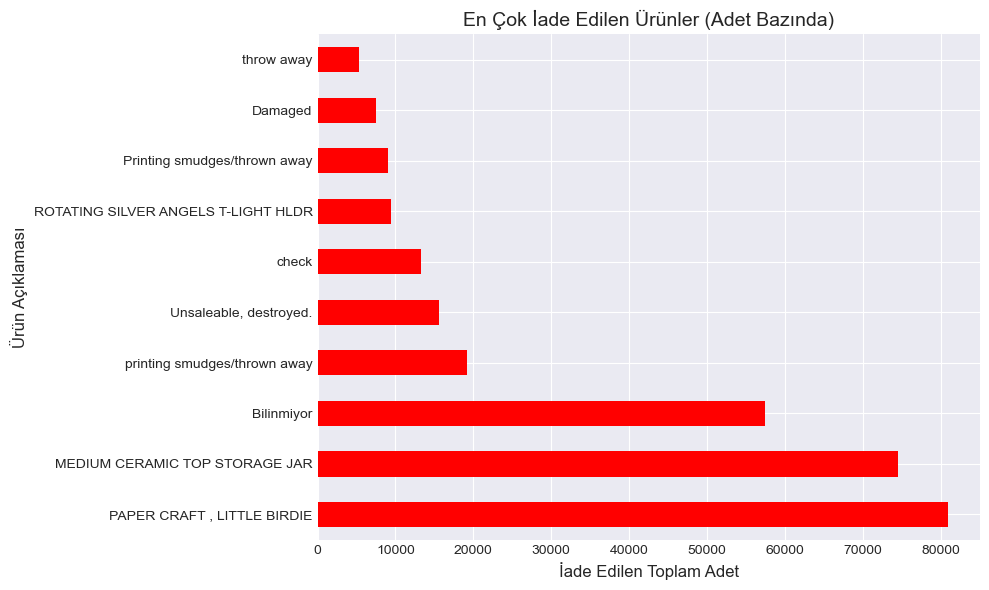

In [13]:
total_returned_items_by_description = returns.groupby('Description')['Quantity'].sum().sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
total_returned_items_by_description.abs().plot(kind='barh', color="r")
plt.title('En Çok İade Edilen Ürünler (Adet Bazında)')
plt.xlabel('İade Edilen Toplam Adet')
plt.ylabel('Ürün Açıklaması')
plt.tight_layout()
plt.show()

### En çok iade yapan 5 ülkeyi göster

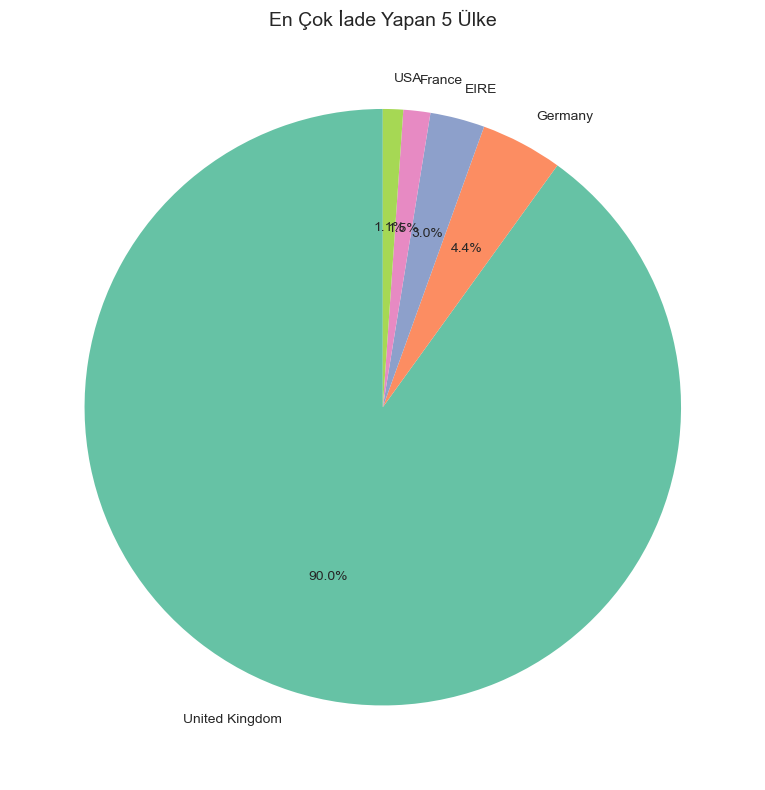

In [14]:
country_based_returns = returns['Country'].value_counts().head(5)

plt.figure(figsize=(8, 8))
country_based_returns.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('En Çok İade Yapan 5 Ülke')
plt.ylabel('') # Pie chart'ta varsayılan y ekseni etiketini kaldır
plt.tight_layout()
plt.show()

### Fatura tarihini datetime formatına çevir

In [15]:
returns['InvoiceDate'] = pd.to_datetime(returns['InvoiceDate'])

### Aylık bazda iade sayılarını hesapla

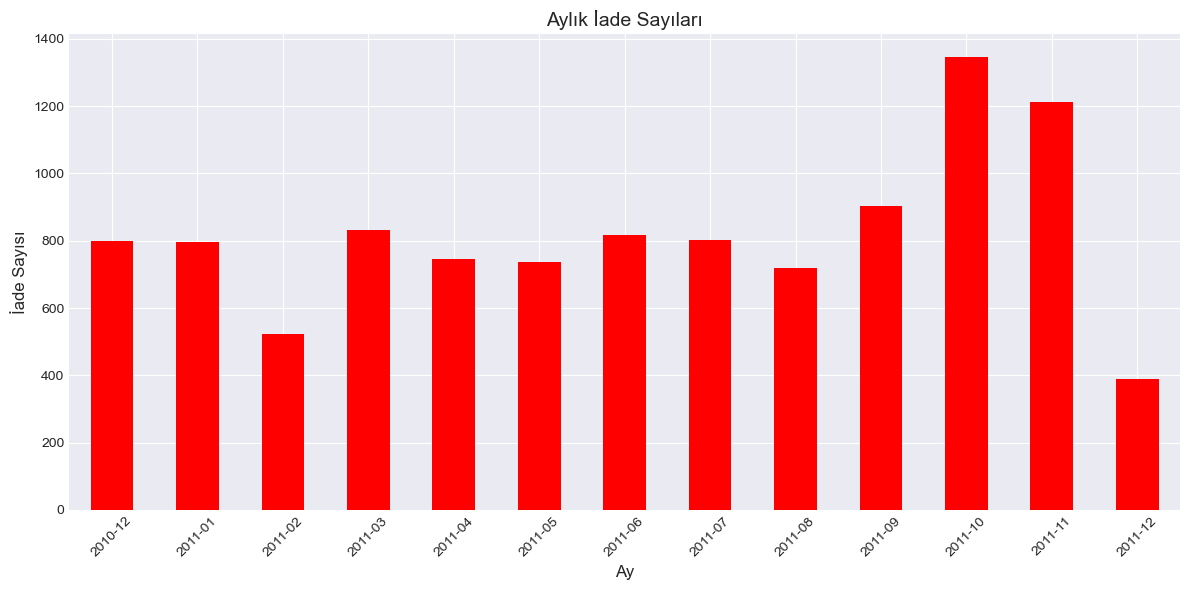

In [16]:
returns['Month'] = returns['InvoiceDate'].dt.to_period('M')
monthly_returns_counts = returns.groupby('Month').size()

plt.figure(figsize=(12, 6))
monthly_returns_counts.plot(kind='bar', color='r')
plt.title('Aylık İade Sayıları')
plt.xlabel('Ay')
plt.ylabel('İade Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### En çok iade eden ülkenin belirlenmesi

In [17]:
top_country = returns['Country'].value_counts().idxmax()
top_country_count = returns['Country'].value_counts().max()
print(f"En çok iade yapan ülke: {top_country} ({top_country_count} iade)")

En çok iade yapan ülke: United Kingdom (9192 iade)


### İade edilen ürünler için iade tutarını hesapla (pozitif değer olarak)
#### İadenin quantity'si negatif olduğu için, sonucu abs() içerisine alarak mutlak değer elde ediyoruz

In [18]:
returns['RefundAmount'] = abs(returns['Quantity'] * returns['UnitPrice'])

### Toplam ve ortalama iade tutarını hesapla

In [19]:
total_refund_amount = returns['RefundAmount'].sum()
average_refund_amount = returns['RefundAmount'].mean()

print(f"Toplam iade tutarı: £{total_refund_amount:.2f}")
print(f"Ortalama iade tutarı: £{average_refund_amount:.2f}")

Toplam iade tutarı: £896812.49
Ortalama iade tutarı: £84.41


## 5. İade Edilen Ürünlerin Fiyat ve Kayıp Analizi

### Hangi ürünlerin fiyatı yüksek olmasına rağmen daha çok iade edilmiş?

In [20]:
high_value_returns_analysis = returns[returns['UnitPrice'] > 10].sort_values(by='UnitPrice', ascending=False)
print("Yüksek fiyatlı ve çok iade edilen ürünler (İlk 10):")
print(high_value_returns_analysis[['Description', 'UnitPrice', 'Quantity', 'RefundAmount']].head(10))

Yüksek fiyatlı ve çok iade edilen ürünler (İlk 10):
       Description  UnitPrice  Quantity  RefundAmount
222681      Manual   38970.00        -1      38970.00
524602  AMAZON FEE   17836.46        -1      17836.46
43702   AMAZON FEE   16888.02        -1      16888.02
43703   AMAZON FEE   16453.71        -1      16453.71
15016   AMAZON FEE   13541.33        -1      13541.33
16356   AMAZON FEE   13541.33        -1      13541.33
16232   AMAZON FEE   13474.79        -1      13474.79
524601  AMAZON FEE   11586.50        -1      11586.50
446533  AMAZON FEE    8286.22        -1       8286.22
173277     POSTAGE    8142.75        -1       8142.75


### Ürün bazlı toplam iade tutarı kaybını göster

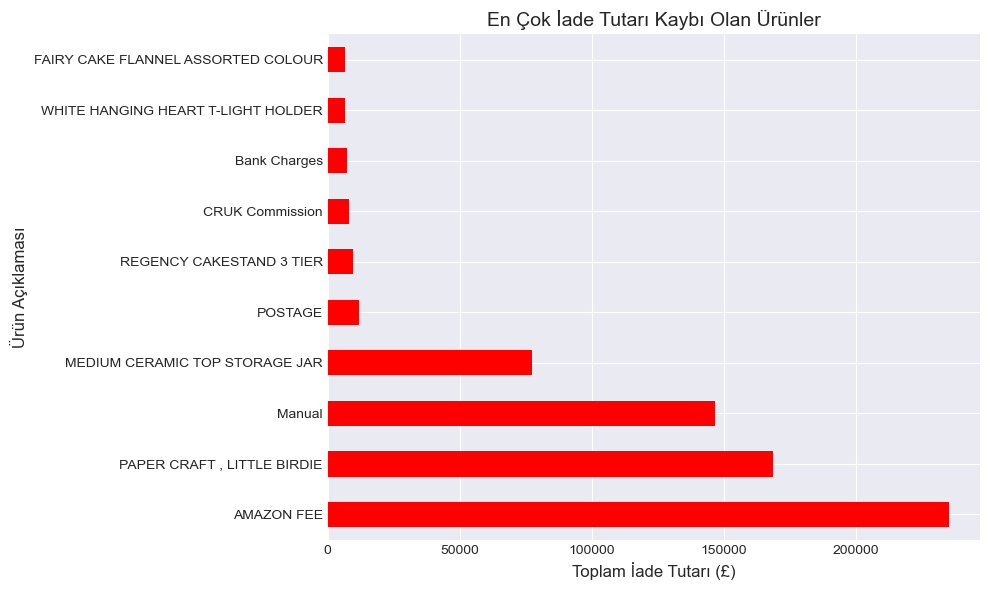

In [21]:
top_loss_products = returns.groupby('Description')['RefundAmount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_loss_products.plot(kind='barh', color='r')
plt.title('En Çok İade Tutarı Kaybı Olan Ürünler')
plt.xlabel('Toplam İade Tutarı (£)')
plt.ylabel('Ürün Açıklaması')
plt.tight_layout()
plt.show()

### Toplam satış ve iade tutarlarını hesapla

In [22]:
total_sales_amount = (sales['Quantity'] * sales['UnitPrice']).sum()
total_returns_sum_for_comparison = returns['RefundAmount'].sum()


print(f"Toplam ürün satışı tutarı: £{total_sales_amount:.2f}")
print(f"Toplam ürün iadesi tutarı: £{total_returns_sum_for_comparison:.2f}")

Toplam ürün satışı tutarı: £10644560.42
Toplam ürün iadesi tutarı: £896812.49


### Toplam satış ve iade tutarlarının karşılaştırılması (Pie Chart)

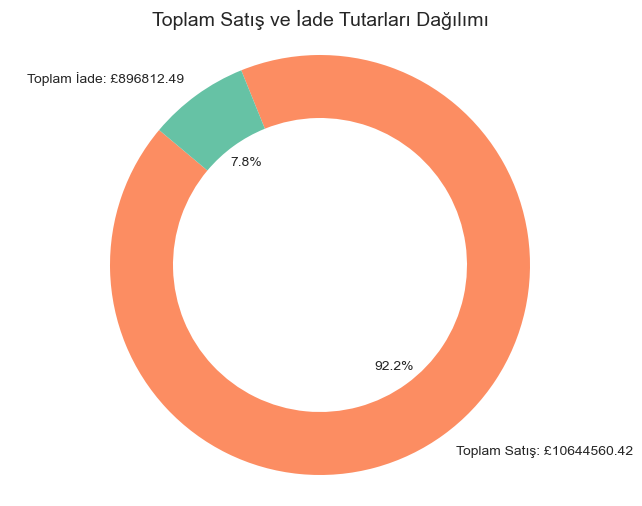

In [23]:
labels = [f'Toplam Satış: £{total_sales_amount:.2f}', f'Toplam İade: £{total_returns_sum_for_comparison:.2f}']
sizes = [total_sales_amount, total_returns_sum_for_comparison]
colors = ['#fc8d62', '#66c2a5'] # Renk paleti seçimi

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3))
plt.title('Toplam Satış ve İade Tutarları Dağılımı')
plt.axis('equal')  # Eşit oranlı daire
plt.show()

### Ürün bazlı ortalama fiyat ve toplam iade adedi ilişkisi

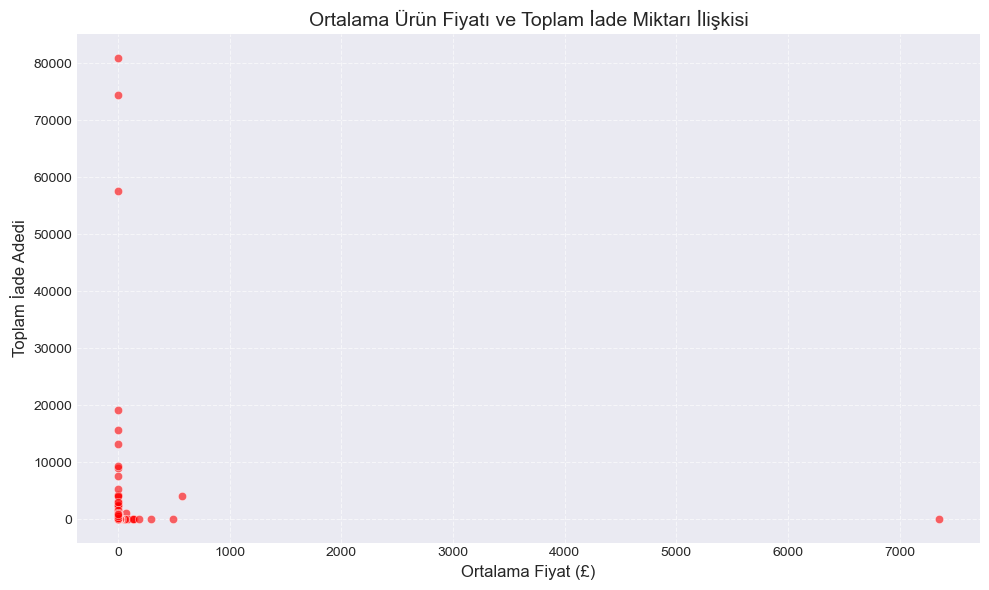

In [24]:
product_stats = returns.groupby('Description').agg(
    AvgPrice=('UnitPrice', 'mean'),
    TotalReturns=('Quantity', 'sum') # Quantity zaten negatif olduğu için, sum negatif bir toplam verir.
)

# Toplam iade miktarını pozitif yapmak için abs() kullan
product_stats['TotalReturns'] = product_stats['TotalReturns'].abs()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_stats, x='AvgPrice', y='TotalReturns', color='r', alpha=0.6)
plt.title('Ortalama Ürün Fiyatı ve Toplam İade Miktarı İlişkisi')
plt.xlabel('Ortalama Fiyat (£)')
plt.ylabel('Toplam İade Adedi')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 6. İade Açıklamalarını Temizleme ve Analiz

### İade nedenlerini gösteren kelimelerin listesi (manuel olarak belirlenmiştir)

In [25]:
filter_words = [
    'damaged', 'destroyed', 'unsaleable', 'smudges', 'thrown away',
    'check', 'incorrect stock', 'throw away', 'manual', 'wrongly',
    'damages', 'wax', 'bilinmiyor', 'mark', 'error', 'missing', 'adjust',
    'breakages', 'smashed', 'faulty', 'worn', 'lost', 'found', 'discount',
    'samples', 'test', 'returned', 'cancellation', 'cracked', 'uncollectable'
]

# `product_stats` DataFrame'inin indeksini (Description) string'e çevir ve küçük harfe dönüştür
# Ardından filtre kelimelerini içeren satırları hariç tut
description_index_lower = product_stats.index.astype(str).str.lower()
temiz_veri = product_stats[~description_index_lower.str.contains('|'.join(filter_words), na=False)]

### Temizlenmiş veriden en çok iade edilen 10 ürünü seç

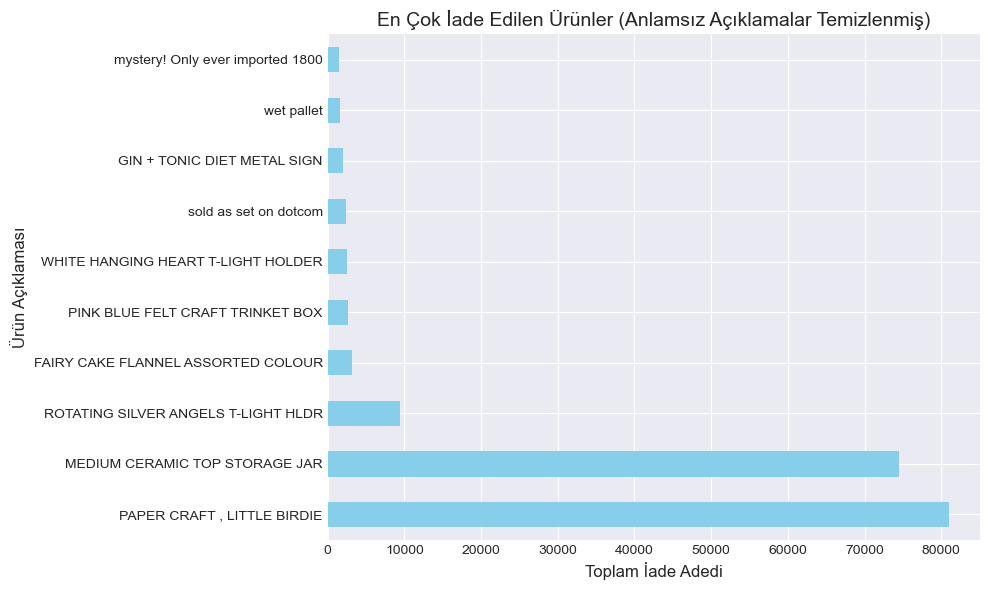

In [26]:
temiz_veri_top_10 = temiz_veri.sort_values(by='TotalReturns', ascending=False).head(10)

plt.figure(figsize=(10, 6))
temiz_veri_top_10['TotalReturns'].plot(kind='barh', color='skyblue')
plt.title('En Çok İade Edilen Ürünler (Anlamsız Açıklamalar Temizlenmiş)')
plt.xlabel('Toplam İade Adedi')
plt.ylabel('Ürün Açıklaması')
plt.tight_layout()
plt.show()

## 7. Satış ve İade Karşılaştırması

### Ürün bazında toplam iade ve satış adetlerini hesapla

<Figure size 1500x1000 with 0 Axes>

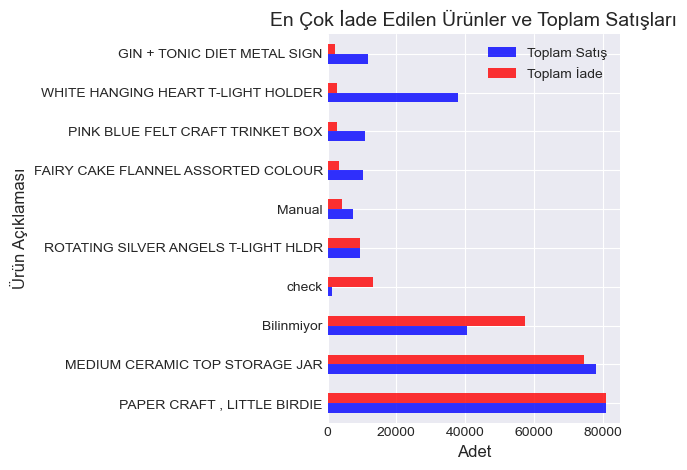

In [27]:
returns_summary_by_description = returns.groupby('Description')['Quantity'].sum().abs() # İadeleri pozitif yap
sales_summary_by_description = sales.groupby('Description')['Quantity'].sum()

# Ortak ürünler için satış ve iade verilerini birleştir
# `inner` join kullanarak sadece hem satışı hem de iadesi olan ürünleri alırız
merged_sales_returns = pd.concat([sales_summary_by_description, returns_summary_by_description], axis=1, join='inner')
merged_sales_returns.columns = ['TotalSales', 'TotalReturns']

# En çok iade edilen 10 ürünü satış adetleri ile birlikte göster
merged_sales_returns_top_10 = merged_sales_returns.sort_values(by='TotalReturns', ascending=False).head(10)

plt.figure(figsize=(15, 10))
merged_sales_returns_top_10.plot(kind='barh', color=['blue', 'red'], alpha=0.8)
plt.title('En Çok İade Edilen Ürünler ve Toplam Satışları')
plt.xlabel('Adet')
plt.ylabel('Ürün Açıklaması')
plt.legend(['Toplam Satış', 'Toplam İade'])
plt.tight_layout()
plt.show()

## Sonuç

##### Bu analiz, iade verilerini çeşitli açılardan inceleyerek işin önemli noktalarını vurgulamıştır. Hangi ürünlerin, hangi ülkelerden ve hangi dönemlerde daha çok iade edildiği gibi bilgiler, işletmelerin iade oranlarını düşürmek ve operasyonel verimliliği artırmak için stratejiler geliştirmesine yardımcı olabilir. Ayrıca, yüksek iade tutarı olan ürünlerin belirlenmesi, potansiyel ürün kalitesi veya pazarlama sorunlarına işaret edebilir.

### Ay bazlı olarak yapılan satış miktarları

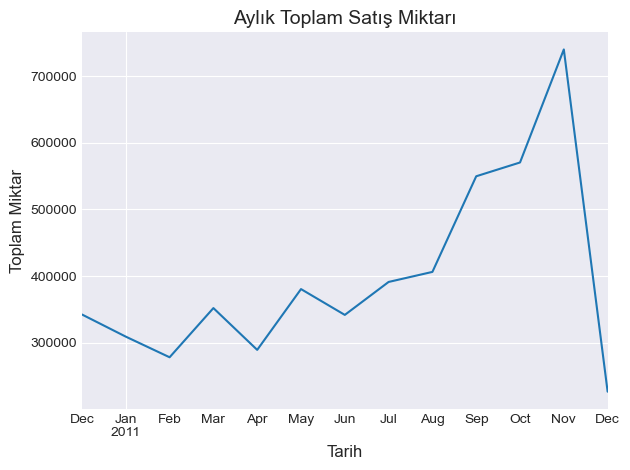

In [28]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate').resample('ME')['Quantity'].sum().plot()

plt.title('Aylık Toplam Satış Miktarı')
plt.xlabel('Tarih')
plt.ylabel('Toplam Miktar')
plt.tight_layout()
plt.show()


### Bir yıl boyunca her gün yapılan iade oranlarının grafikle gösterilmesi

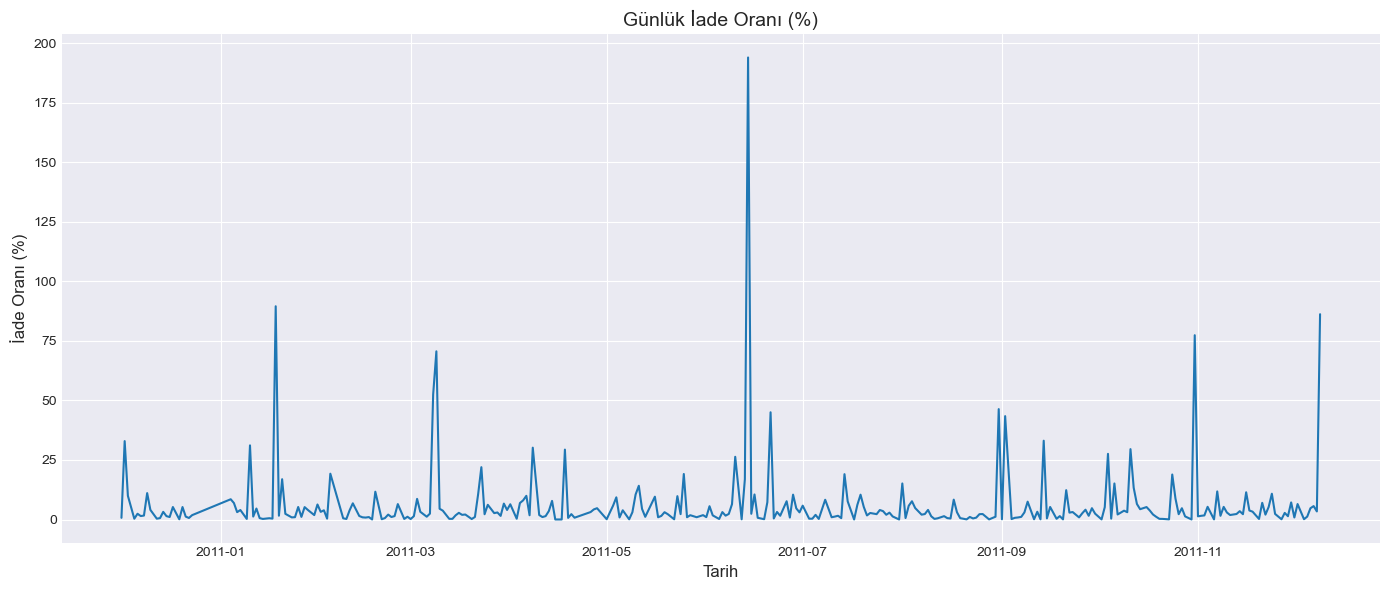

In [29]:
# Tarih formatına çevir
sales['InvoiceDate'] = pd.to_datetime(sales['InvoiceDate'])
returns['InvoiceDate'] = pd.to_datetime(returns['InvoiceDate'])

# Günlük toplam satış ve iade miktarları
daily_sales = sales.groupby(sales['InvoiceDate'].dt.date)['Quantity'].sum()
daily_returns = returns.groupby(returns['InvoiceDate'].dt.date)['Quantity'].sum().abs()

# Ortak tarihleri al
common_dates = daily_sales.index.intersection(daily_returns.index)

# İade oranını hesapla
daily_return_rate = (daily_returns[common_dates] / daily_sales[common_dates]) * 100

# Görselleştirme

plt.figure(figsize=(14, 6))
daily_return_rate.plot()
plt.title('Günlük İade Oranı (%)')
plt.ylabel('İade Oranı (%)')
plt.xlabel('Tarih')
plt.grid(True)
plt.tight_layout()
plt.show()


### Haftanın günlerine göre satış ve iade oranları

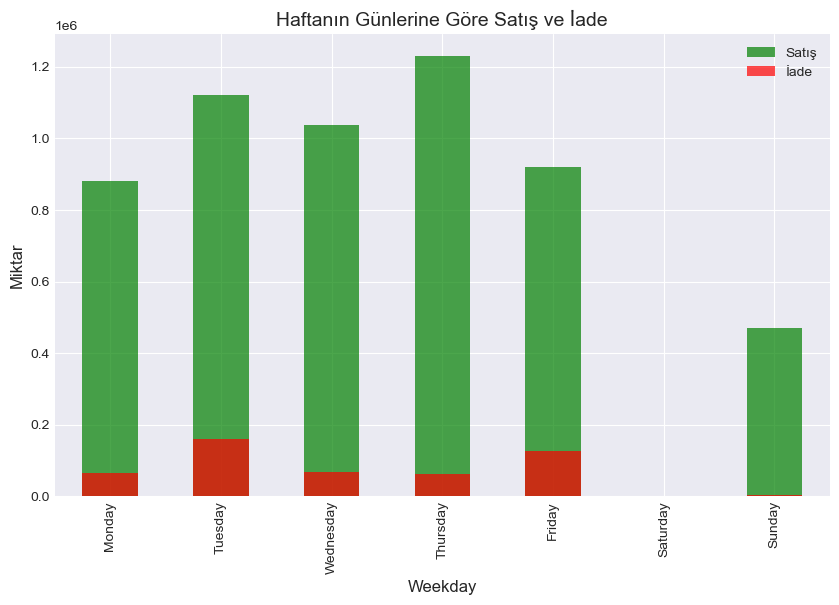

In [30]:
sales['Weekday'] = sales['InvoiceDate'].dt.day_name()
returns['Weekday'] = returns['InvoiceDate'].dt.day_name()

sales_by_day = sales.groupby('Weekday')['Quantity'].sum()
returns_by_day = returns.groupby('Weekday')['Quantity'].sum().abs()

# Haftanın gün sırasına göre
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = sales_by_day.reindex(days_order)
returns_by_day = returns_by_day.reindex(days_order)

sales_by_day.plot(kind='bar', color='green', alpha=0.7, label='Satış', figsize=(10,6))
returns_by_day.plot(kind='bar', color='red', alpha=0.7, label='İade')
plt.title("Haftanın Günlerine Göre Satış ve İade")
plt.ylabel("Miktar")
plt.legend()
plt.show()



### Haftanın günlerinin yaptığı satış miktarları

In [31]:
sales['Weekday'] = sales['InvoiceDate'].dt.day_name()
print(sales['Weekday'].value_counts())


Weekday
Thursday     101221
Tuesday       99804
Monday        93308
Wednesday     92559
Friday        80483
Sunday        63910
Name: count, dtype: int64


### Sezonlara, trendlere ve özel günlere göre satış analizi

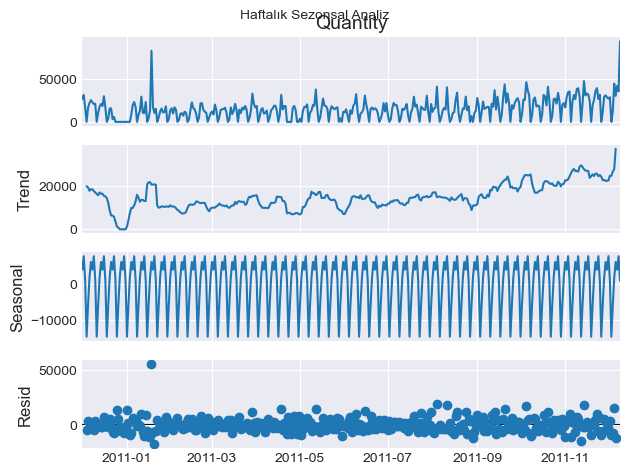

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Günlük satış toplamı
daily_sales = sales.set_index('InvoiceDate').resample('D')['Quantity'].sum().asfreq('D').fillna(0)

# Sezonsal ayrıştırma (period=7 ile haftalık döngü aranır)
result = seasonal_decompose(daily_sales, model='additive', period=7)
result.plot()
plt.suptitle('Haftalık Sezonsal Analiz', fontsize=10)
plt.show()


Seasonal kısmındaki düşüşler Cumartesi gününe ait verilerin girilmediğinden kaynaklanmaktadır!!!

## Prophet kullanarak gelecek senenin 90 günü için tahmini satış verileri oluşturma

14:15:46 - cmdstanpy - INFO - Chain [1] start processing
14:15:46 - cmdstanpy - INFO - Chain [1] done processing


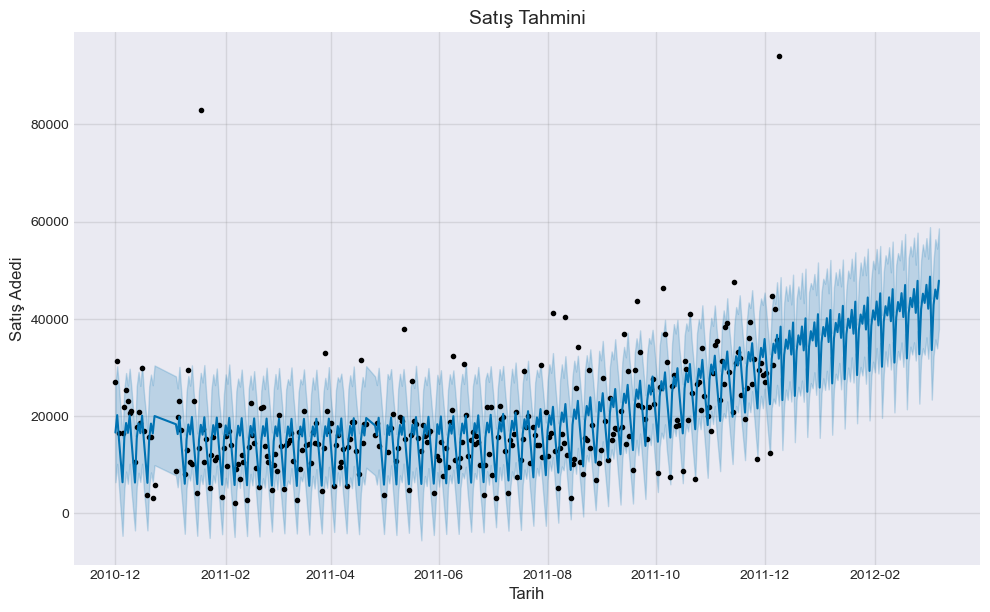

In [33]:
daily_sales = sales.groupby(sales['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
daily_sales.columns = ['ds', 'y']  # Prophet bunu ister

from prophet import Prophet
model = Prophet()
model.fit(daily_sales)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

model.plot(forecast)
plt.title("Satış Tahmini")
plt.xlabel("Tarih")
plt.ylabel("Satış Adedi")
plt.show()



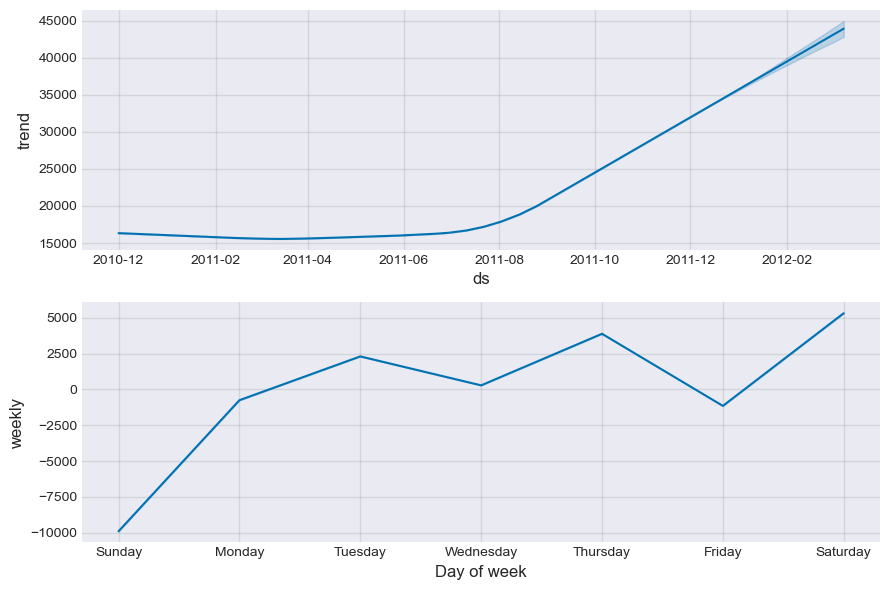

In [34]:
model.plot_components(forecast)
plt.show()





In [35]:
returns['ReturnQantity'] = returns['Quantity'].abs()  # İade miktarını pozitif yap
returns['RefundAmount'] = returns['ReturnQantity'] * returns['UnitPrice']  # İade tutarını hesapla

returns['RefundAmount']

141        27.50
154         4.65
235        19.80
236         6.96
237         6.96
           ...  
540449      9.13
541541    224.69
541715     54.75
541716      1.25
541717      6.25
Name: RefundAmount, Length: 10624, dtype: float64

### İade sebeplerini kategorize etme


İade Nedenlerine Göre Dağılım:
ReturnReason
Diğer Nedenler                       9035
Operasyonel/İç Hata veya Anlamsız    1489
Hasarlı/Kusurlu Ürün                   74
Yanlış Ürün/Sipariş                    26
Name: count, dtype: int64


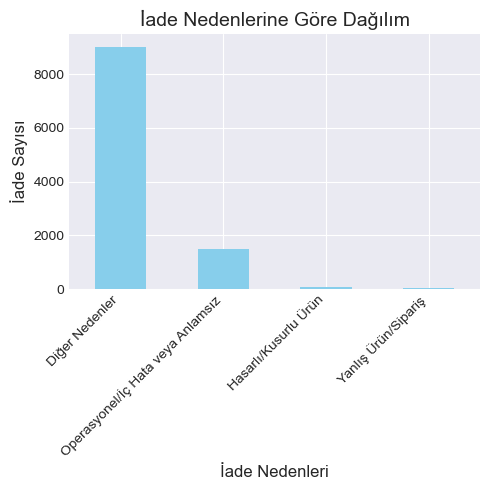

In [36]:
def categorize_return_reason(description):
    description = str(description).lower()

    # Temel iade nedenlerini tanımlayan anahtar kelimeler
    damaged_keywords = ['damaged', 'faulty', 'broken', 'defective', 'smashed', 'cracked', 'breakages']
    incorrect_keywords = ['wrongly', 'incorrect', 'missing', 'sent back']
    customer_choice_keywords = ['no longer needed', 'cancelled', 'unwanted', 'returned']

    # 'filter_words' listesindeki kelimelerin çoğu operasyonel veya net olmayan iade nedenlerini ifade eder.
    # Bunları genel bir "Operasyonel/Anlamsız" kategori altında toplayalım.
    # Ancak, 'filter_words' içindeki bazı kelimeler (örn. 'damaged', 'missing') zaten daha spesifik kategorilerimize dahil edilmişti.
    # Bu nedenle, 'filter_words' listesini, spesifik kategorilerimize uymayan ancak operasyonel/iç hata olabilecek genel terimleri içerecek şekilde kullanmalıyız.
    # Basitlik adına, filter_words içindeki kelimeleri doğrudan operasyonel hata olarak kabul edelim
    # ve spesifik nedenler bu listeden önce kontrol edilsin.
    operational_or_unclear_keywords = [
        'unsaleable', 'smudges', 'thrown away', 'check', 'incorrect stock', 'throw away',
        'manual', 'wax', 'bilinmiyor', 'mark', 'error', 'adjust', 'lost', 'found',
        'discount', 'samples', 'test', 'cancellation', 'uncollectable', 'worn'
    ]


    # 1. Hasarlı/Kusurlu Ürün Kontrolü
    if any(keyword in description for keyword in damaged_keywords):
        return 'Hasarlı/Kusurlu Ürün'
    # 2. Yanlış Ürün/Sipariş Kontrolü
    elif any(keyword in description for keyword in incorrect_keywords):
        return 'Yanlış Ürün/Sipariş'
    # 3. Müşteri Fikrini Değiştirdi/İstemiyor Kontrolü
    elif any(keyword in description for keyword in customer_choice_keywords):
        return 'Müşteri Fikrini Değiştirdi/İstemiyor'
    # 4. Operasyonel/Anlamsız Nedenler Kontrolü (Yukarıdaki listeye göre)
    elif any(keyword in description for keyword in operational_or_unclear_keywords):
        return 'Operasyonel/İç Hata veya Anlamsız'
    # 5. Hiçbirine uymayanlar
    else:
        return 'Diğer Nedenler'

# Kullanım örneği:
# returns['ReturnReason'] = returns['Description'].apply(categorize_return_reason)
returns['ReturnReason'] = returns['Description'].apply(categorize_return_reason)

print("\nİade Nedenlerine Göre Dağılım:")
print(returns['ReturnReason'].value_counts())

plt.figure(figsize=(5,5))
returns['ReturnReason'].value_counts().plot(kind='bar', color='skyblue')
plt.title('İade Nedenlerine Göre Dağılım')
plt.xlabel('İade Nedenleri')
plt.ylabel('İade Sayısı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Varsayımsal kar marjı vererek iadeden ne kadar kar kaybedildiğini hesaplama


İadelerden Kaynaklanan Tahmini Toplam Potansiyel Kar Kaybı: £269043.75


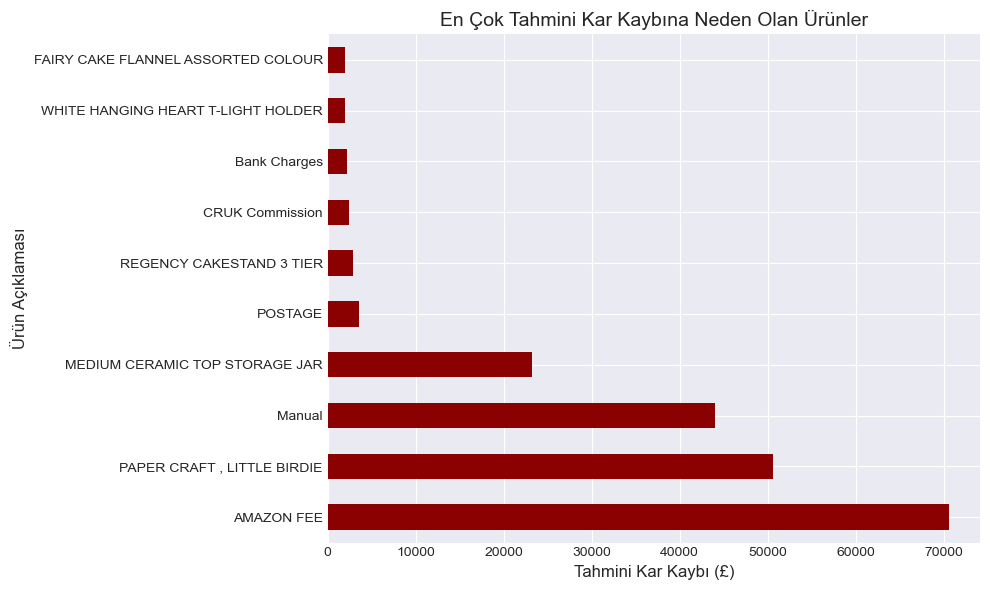

In [37]:
# Varsayımsal bir brüt kar marjı belirleyelim (Örnek: %30)
assumed_profit_margin = 0.30

  # Her bir iadenin potansiyel kar kaybını hesaplayalım
returns['PotentialProfitLoss'] = returns['RefundAmount'] * assumed_profit_margin

total_potential_profit_loss = returns['PotentialProfitLoss'].sum()
print(f"\nİadelerden Kaynaklanan Tahmini Toplam Potansiyel Kar Kaybı: £{total_potential_profit_loss:.2f}")

  # En çok kar kaybına neden olan ürünler
top_profit_loss_products = returns.groupby('Description')['PotentialProfitLoss'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_profit_loss_products.plot(kind='barh', color='darkred')
plt.title('En Çok Tahmini Kar Kaybına Neden Olan Ürünler')
plt.xlabel('Tahmini Kar Kaybı (£)')
plt.ylabel('Ürün Açıklaması')
plt.tight_layout()
plt.show()